In [1]:
# This program calculates the absorption spectra of the mirror geometry by using transfer matrix
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
from numpy.linalg import inv

In [2]:
# The necessary constants
hbar = 1.055e-34 # the reduced Planck constant
c    = 3e8 # the light velocity
e    = 1.602e-19 # electron charge
sig  = e * e / (4 * hbar) # the optical conductivity of undoped graphene
alpha= 3 # the ratio of na to nb
lmbd = 632e-9 # the wavelenght
omega= 2 * np.pi * c / lmbd # the angular frequency
nb   = 1.5 # the refractive index of B medium
eps0 = 8.8502e-12 # the vacuum permitivity

In [3]:
# The matching matrix

def M(x,y): #x is n_i+1, y is n_i
    A = 1 + x / y
    B = 1 - x / y
    return 0.5 * np.array([[A,B],[B,A]])

# The propagation matrix

def P(x,d): # x is the n_i, d is the thickness
    k = 2 * np.pi * x / (lmbd)
    A = 1j * k * d
    return np.array([[np.exp(-A),0],[0,np.exp(A)]])

# The matching matrix with graphene

def MG(x,y,z): #x is n_i+1, y is n_i, z is the conductivity
    k = 2 * np.pi * y / (lmbd)
    A = 1 + x / y + k * z / (omega * eps0 * y * y)
    B = 1 - x / y + k * z / (omega * eps0 * y * y)
    C = 1 - x / y - k * z / (omega * eps0 * y * y)
    D = 1 + x / y - k * z / (omega * eps0 * y * y)
    return 0.5 * np.array([[A,B],[C,D]])

# The transfer matrix for mirror symmetry with s repetition

def TF(x,s): # x is the alpha and s is the repetition
    na = x * nb
    d1 = lmbd / (4 * na)
    d2 = lmbd / (4 * nb)
    J1 = M(na,1)  @ P(na,d1) @ M(nb,na) @ P(nb,d2)
    J2 = M(na,nb) @ P(na,d1) @ M(nb,na) @ P(nb,d2)
    J3 = P(nb,d2) @ M(na,nb) @ P(na,d1) @ M(nb,na)
    J4 = P(nb,d2) @ M(na,nb) @ P(na,d1) @ M(1,na)
    JT = J1 @ matrix_power(J2,s-1) @ MG(nb,nb,sig) @ matrix_power(J3,s-1) @ J4
    return JT

# Calculation of absorption probability

def ap(x,s):# x is the alpha and s is the repetition
    T = np.abs(1/(TF(x,s)[0,0]))**2
    R = np.abs((TF(x,s)[1,0])/(TF(x,s)[0,0]))**2
    return 1 - T - R

# Calculation of electric field at the graphene

def ec(x,s):# x is the alpha and s is the repetition
    et = 1/(TF(x,s)[0,0]) 
    na = x * nb
    d1 = lmbd / (4 * na)
    d2 = lmbd / (4 * nb)
    J1 = M(na,1)  @ P(na,d1) @ M(nb,na) @ P(nb,d2)
    J2 = M(na,nb) @ P(na,d1) @ M(nb,na) @ P(nb,d2)
    JT = J1 @ matrix_power(J2,s-1) @ MG(nb,nb,sig)
    JC = inv(JT) @ np.array([[et],[0]])
    return np.abs(JC[0] + JC[1])


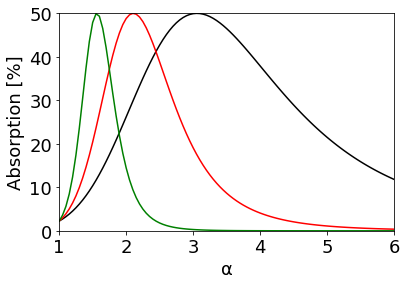

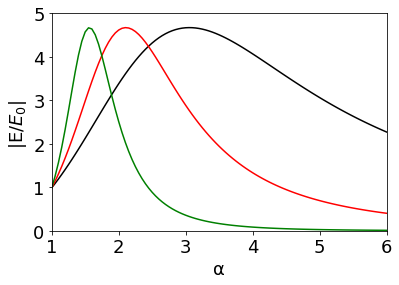

In [30]:
# Plotting the Absorption and electric field at graphene
nd = 100 # number of data
AB1 = np.zeros(nd+1) # the data for absorption in percent for s = 2
EE1 = np.zeros(nd+1) # the data for electric field for s = 2
AB2 = np.zeros(nd+1) # the data for absorption in percent for s = 3
EE2 = np.zeros(nd+1) # the data for electric field for s = 3
AB3 = np.zeros(nd+1) # the data for absorption in percent for s = 5
EE3 = np.zeros(nd+1) # the data for electric field for s = 5
AA = np.zeros(nd+1) # the data for alpha

for i in range (nd+1):
    AA[i]    = (6 - 1 ) * i/nd + 1
    AB1[i]    = ap(AA[i],2) * 100
    EE1[i]    = ec(AA[i],2)
    AB2[i]    = ap(AA[i],3) * 100
    EE2[i]    = ec(AA[i],3)
    AB3[i]    = ap(AA[i],5) * 100
    EE3[i]    = ec(AA[i],5)

# absorption as a function of alpha
    
plt.plot( AA, AB1, 'k', AA, AB2, 'r', AA, AB3, 'g')
plt.tick_params( labelsize  = 18 )
plt.ylabel('Absorption [%]',size  = 18)
plt.xlabel('α',size  = 18)
plt.xlim([1,6])
plt.ylim([0,50])
plt.show()

# electric field as a function of alpha

plt.plot( AA, EE1, 'k', AA, EE2, 'r', AA, EE3,'g')
plt.tick_params( labelsize  = 18 )
plt.ylabel('|E/$E_0$| ',size  = 18)
plt.xlabel('α',size  = 18)
plt.xlim([1,6])
plt.ylim([0,5])
plt.show()